In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn import metrics

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from matplotlib import pyplot as plt

from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# https://www.kaggle.com/heart_datasetsets/johnsmith88/heart-disease-heart_datasetset
heart_dataset = pd.read_csv("dataset/heart.csv")
    # age
    # sex
    # chest pain type (4 values)
    # resting blood pressure
    # serum cholestoral in mg/dl
    # fasting blood sugar > 120 mg/dl
    # resting electrocardiographic results (values 0,1,2)
    # maximum heart rate achieved
    # exercise induced angina
    # oldpeak = ST depression induced by exercise relative to rest
    # the slope of the peak exercise ST segment
    # number of major vessels (0-3) colored by flourosopy
    # thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
    # The names and social security numbers of the patients were recently removed from the heart_datasetbase, replaced with dummy values.

    #  "cp": "chest_pain_type",
    #  "trestbps": "resting_bp",
    #  "chol": "cholesterol",
    # "fbs": "fasting_blood_sugar",
    #  "restecg": "rest_ecg",
    #  "thalach": "max_heart_rate",
    #  "exang": "exercise_angina",
    #  "oldpeak": "st_depression",
    #  "slope": "st_slope",
    #  "ca": "major_vessels",
    # "thal": "thalassemia"

In [3]:
heart_dataset.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [4]:
# formatting column names
heart_dataset.columns = [col.lower().replace(' ', '_') for col in heart_dataset.columns]

In [5]:
heart_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [6]:
heart_dataset.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
print(heart_dataset)

      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  target  
0         2   2     3       0  
1         0

In [8]:
# Convert non-numeric heart_dataset to numeric heart_dataset
le = LabelEncoder()
heart_dataset['sex'] = le.fit_transform(heart_dataset['sex'])
heart_dataset['cp'] = le.fit_transform(heart_dataset['cp'])
heart_dataset['fbs'] = le.fit_transform(heart_dataset['fbs'])
heart_dataset['restecg'] = le.fit_transform(heart_dataset['restecg'])
heart_dataset['exang'] = le.fit_transform(heart_dataset['exang'])
heart_dataset['slope'] = le.fit_transform(heart_dataset['slope'])
heart_dataset['thal'] = le.fit_transform(heart_dataset['thal'])
heart_dataset.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0

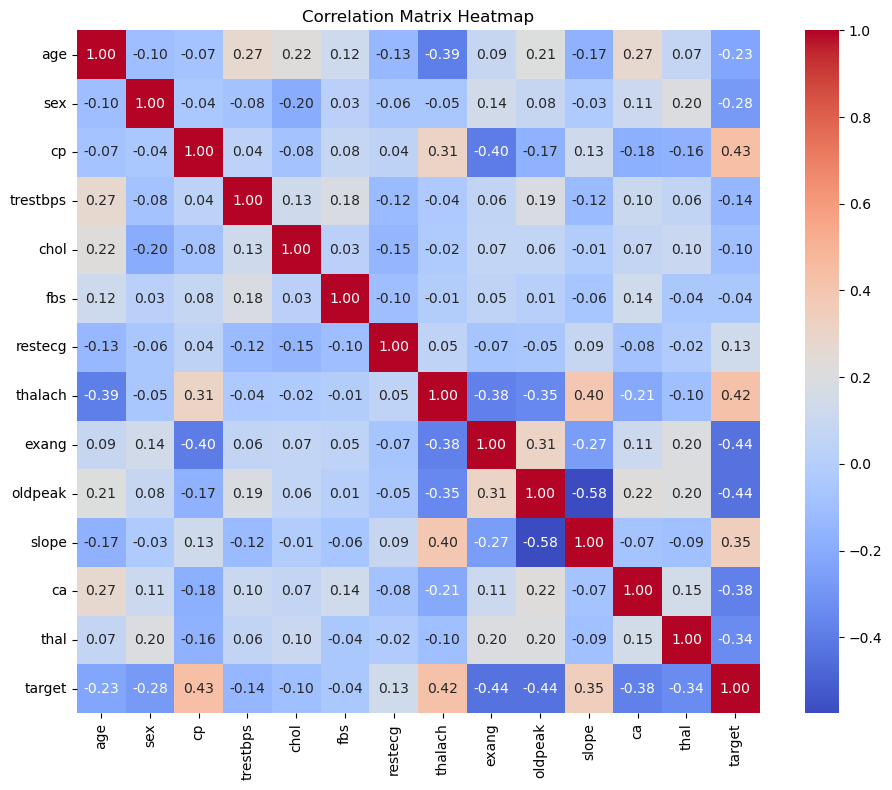

In [9]:
# correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = heart_dataset.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Matrix Heatmap")
plt.tight_layout()
plt.show()


In [10]:
for col in heart_dataset.columns:
    print(f"Column: {col}")
    print(heart_dataset[col].unique())
    print()


Column: age
[52 53 70 61 62 58 55 46 54 71 43 34 51 50 60 67 45 63 42 44 56 57 59 64
 65 41 66 38 49 48 29 37 47 68 76 40 39 77 69 35 74]

Column: sex
[1 0]

Column: cp
[0 1 2 3]

Column: trestbps
[125 140 145 148 138 100 114 160 120 122 112 132 118 128 124 106 104 135
 130 136 180 129 150 178 146 117 152 154 170 134 174 144 108 123 110 142
 126 192 115  94 200 165 102 105 155 172 164 156 101]

Column: chol
[212 203 174 294 248 318 289 249 286 149 341 210 298 204 308 266 244 211
 185 223 208 252 209 307 233 319 256 327 169 131 269 196 231 213 271 263
 229 360 258 330 342 226 228 278 230 283 241 175 188 217 193 245 232 299
 288 197 315 215 164 326 207 177 257 255 187 201 220 268 267 236 303 282
 126 309 186 275 281 206 335 218 254 295 417 260 240 302 192 225 325 235
 274 234 182 167 172 321 300 199 564 157 304 222 184 354 160 247 239 246
 409 293 180 250 221 200 227 243 311 261 242 205 306 219 353 198 394 183
 237 224 265 313 340 259 270 216 264 276 322 214 273 253 176 284 305 168
 407 

In [11]:
X=heart_dataset.drop(['target'], axis =1)
y=heart_dataset['target']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# handle missing values
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

In [14]:
from sklearn.tree import DecisionTreeClassifier

model= DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [15]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Predictions
X_test_prediction = model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, X_test_prediction)
print(f'Accuracy: {accuracy}')

# Precision, Recall, F1 Score
precision = precision_score(y_test, X_test_prediction, average='weighted')
recall = recall_score(y_test, X_test_prediction, average='weighted')
f1 = f1_score(y_test, X_test_prediction, average='weighted')

print(f'Precision: {precision:.2%}')
print(f'Recall: {recall:.2%}')
print(f'F1 Score: {f1:.2%}')

# Alternatively, full classification report
print("\nClassification Report:")
print(classification_report(y_test, X_test_prediction))


Accuracy: 0.9853658536585366
Precision: 98.58%
Recall: 98.54%
F1 Score: 98.54%

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



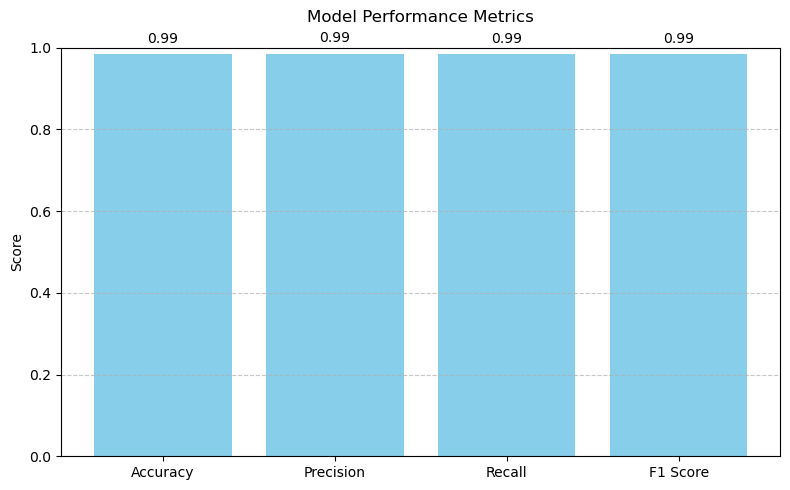

In [16]:
# Plot bar chart
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
scores = [accuracy, precision, recall, f1]  # keep all as float

plt.figure(figsize=(8, 5))
bars = plt.bar(metrics, scores, color='skyblue')
plt.ylim(0, 1)
plt.ylabel('Score')
plt.title('Model Performance Metrics\n')

# Annotate bars with numeric values
for bar, score in zip(bars, scores):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.02, f"{score:.2f}", ha='center', va='bottom')

plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [18]:
# Confusion matrix
cm = metrics.confusion_matrix(y_test, X_test_prediction)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", 
            xticklabels=['Non-cardiac', 'cardiac'], 
            yticklabels=['Non-cardiac', 'cardiac'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

AttributeError: 'list' object has no attribute 'confusion_matrix'

In [19]:
print(classification_report(y_test, X_test_prediction))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



In [20]:
heart_dataset.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [21]:
import pickle
filename = 'model/heart_disease_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [22]:
heart_dataset.to_csv('data_preprocessed/heart.csv',index=False)

In [23]:
import pandas as pd
import numpy as np
import pickle  # or joblib if you used it to save

# Load the saved model (pipeline or classifier)
with open('model/heart_disease_model.sav', 'rb') as file:
    model = pickle.load(file)

# Define the input data and columns
input_data = (62, 0, 0, 140, 268, 0, 0, 160, 0, 3.6, 0, 2, 2)
columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
           'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']

# Create a DataFrame
input_data_heart_dataset = pd.DataFrame([input_data], columns=columns)

In [24]:
prediction = model.predict(input_data_heart_dataset)

# Output result
if prediction[0] == 0:
    print('The person does not have heart disease.')
else:
    print('The person has heart disease.')

The person does not have heart disease.


/home/yeshey/anaconda3/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


In [25]:
heart_dataset.tail()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  target  
1020      2   0     2       1  
1021      1   1     3       0  
1022      1   1     2       0  
1023      2   0     2       1  
1024      1   1     3       0

In [26]:
for col in heart_dataset.columns:
    print(f"Column: {col}")
    print(heart_dataset[col].unique())
    print()


Column: age
[52 53 70 61 62 58 55 46 54 71 43 34 51 50 60 67 45 63 42 44 56 57 59 64
 65 41 66 38 49 48 29 37 47 68 76 40 39 77 69 35 74]

Column: sex
[1 0]

Column: cp
[0 1 2 3]

Column: trestbps
[125 140 145 148 138 100 114 160 120 122 112 132 118 128 124 106 104 135
 130 136 180 129 150 178 146 117 152 154 170 134 174 144 108 123 110 142
 126 192 115  94 200 165 102 105 155 172 164 156 101]

Column: chol
[212 203 174 294 248 318 289 249 286 149 341 210 298 204 308 266 244 211
 185 223 208 252 209 307 233 319 256 327 169 131 269 196 231 213 271 263
 229 360 258 330 342 226 228 278 230 283 241 175 188 217 193 245 232 299
 288 197 315 215 164 326 207 177 257 255 187 201 220 268 267 236 303 282
 126 309 186 275 281 206 335 218 254 295 417 260 240 302 192 225 325 235
 274 234 182 167 172 321 300 199 564 157 304 222 184 354 160 247 239 246
 409 293 180 250 221 200 227 243 311 261 242 205 306 219 353 198 394 183
 237 224 265 313 340 259 270 216 264 276 322 214 273 253 176 284 305 168
 407 

In [27]:
describe = heart_dataset.describe(include="all")
describe.style.background_gradient(cmap='Pastel1')

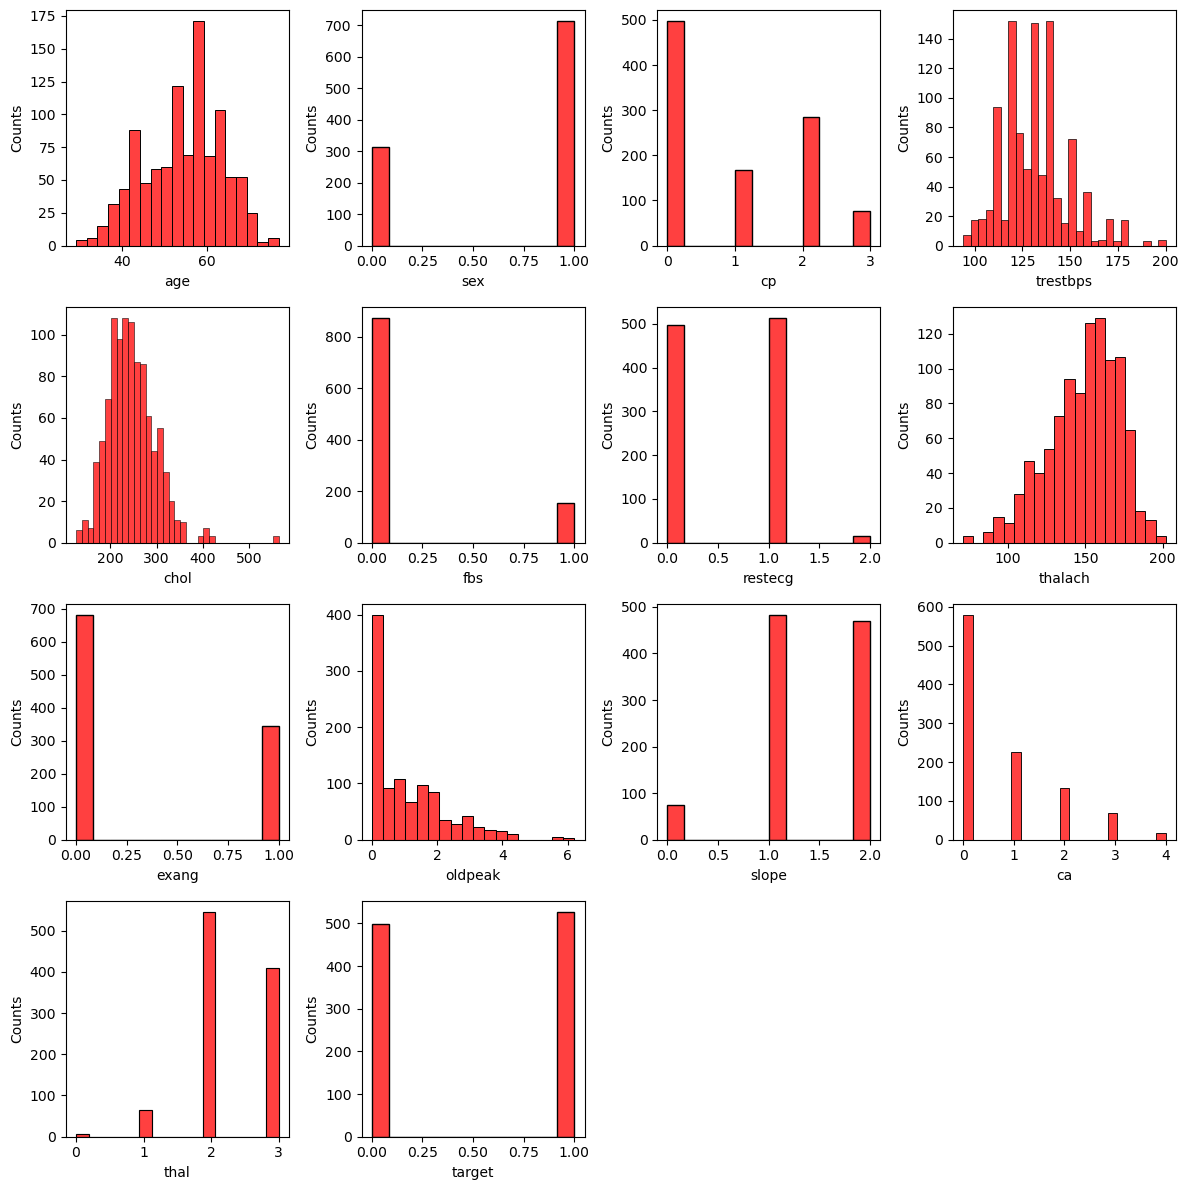

In [28]:
plt.figure(figsize=(12,12))
plotnumber = 1
for column in heart_dataset:
    if plotnumber <= 14:
        ax = plt.subplot(4,4,plotnumber)
        sns.histplot(heart_dataset[column], color = 'Red')
        plt.xlabel(column)
        plt.ylabel('Counts')
    plotnumber+=1
plt.tight_layout()

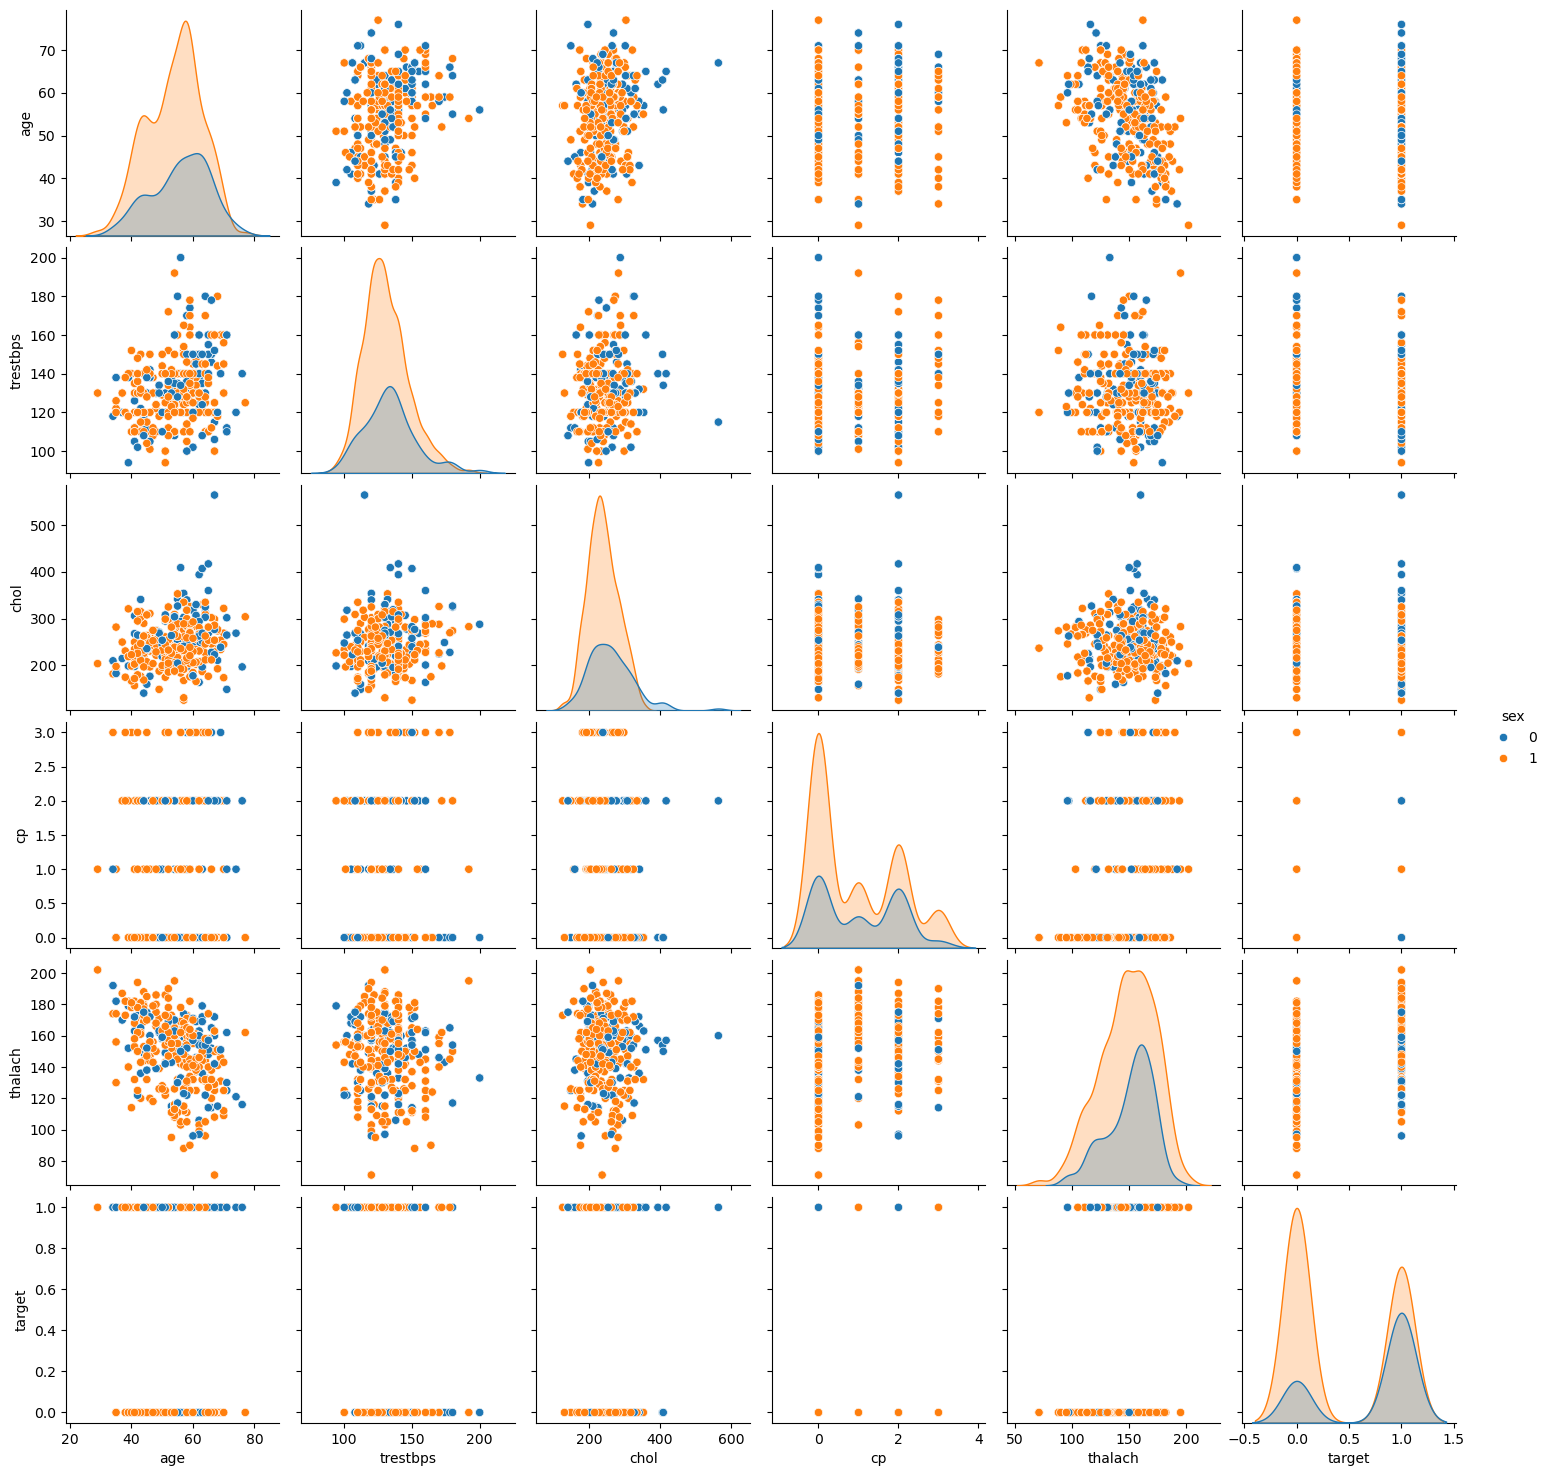

In [29]:
sns.pairplot(heart_dataset[["age", "sex", "trestbps", "chol", "cp","thalach", "target"]], hue='sex')

##################################################
Summary of 'exang'
##################################################
       Count  Ratio (%)
exang                  
0        680  66.341463
1        345  33.658537
##################################################
##################################################
Summary of 'restecg'
##################################################
         Count  Ratio (%)
restecg                  
1          513  50.048780
0          497  48.487805
2           15   1.463415
##################################################
##################################################
Summary of 'ca'
##################################################
    Count  Ratio (%)
ca                  
0     578  56.390244
1     226  22.048780
2     134  13.073171
3      69   6.731707
4      18   1.756098
##################################################
##################################################
Summary of 'sex'
############################################

/tmp/ipykernel_7269/1828454129.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col_name, data=dataframe, palette='YlOrRd', order=value_counts.index, ax=ax)  # Hot color palette
/tmp/ipykernel_7269/1828454129.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col_name, data=dataframe, palette='YlOrRd', order=value_counts.index, ax=ax)  # Hot color palette
/tmp/ipykernel_7269/1828454129.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col_name, data=dataframe, palette='YlOrRd', order=value_counts.index, ax=ax)  # Hot col

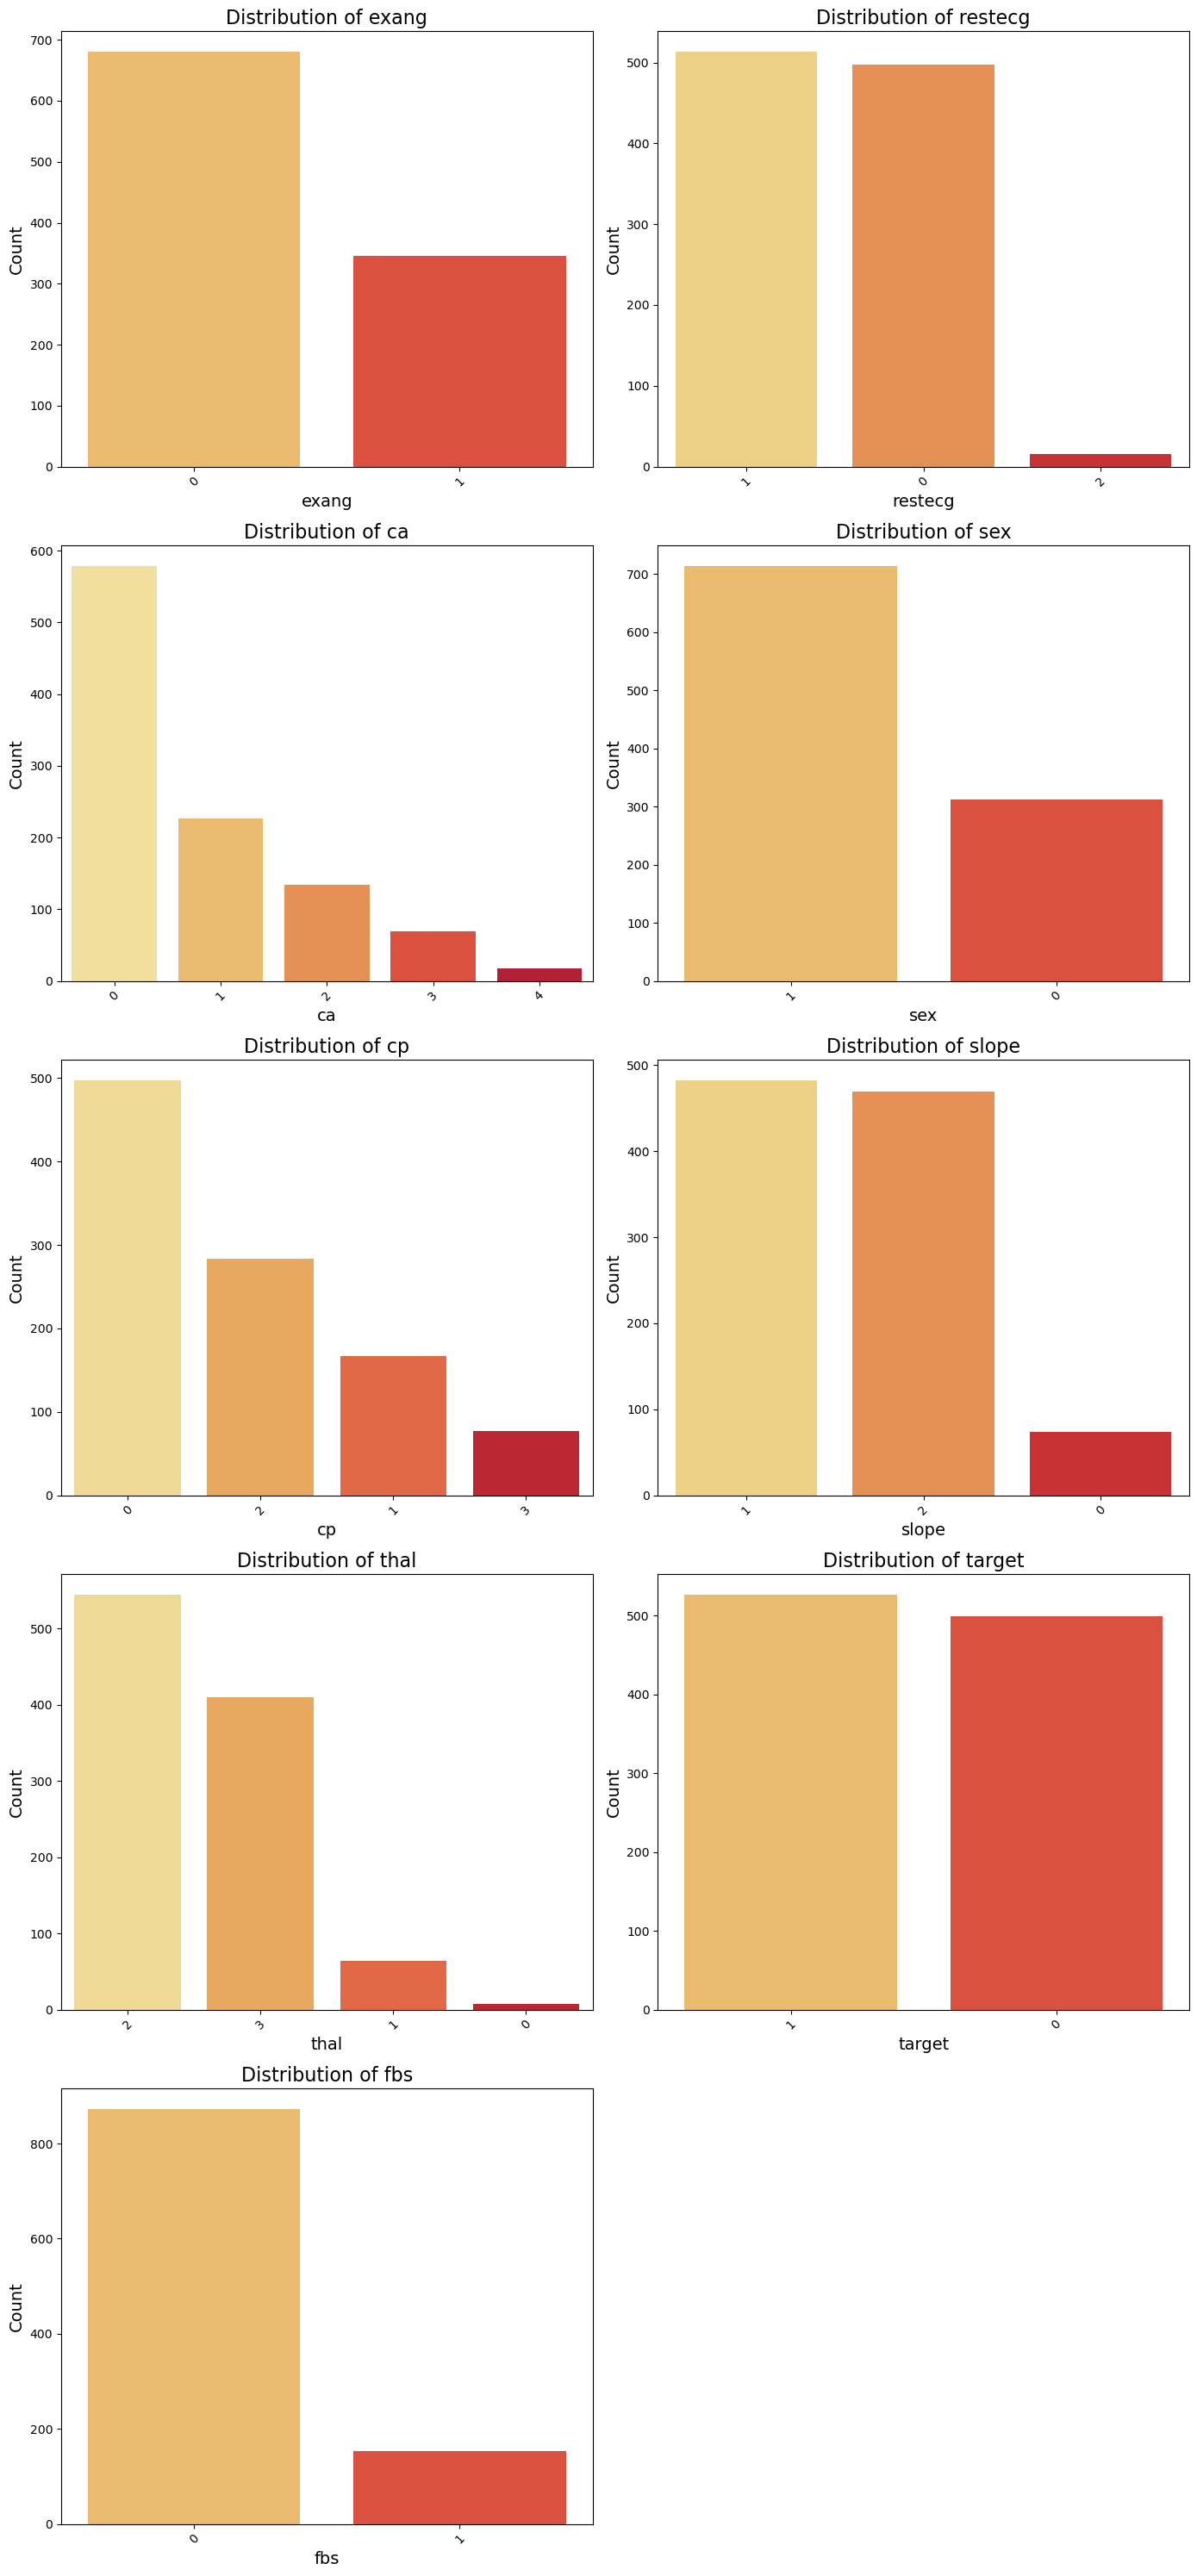

In [30]:
# Identify categorical columns (both object and low cardinality numeric columns)
cat_cols = [col for col in heart_dataset.columns if heart_dataset[col].dtype == 'O']  # Object columns
num_but_cat = [col for col in heart_dataset.columns if heart_dataset[col].nunique() < 10 and heart_dataset[col].dtype != 'O']  # Numeric columns with fewer than 10 unique values
cat_but_car = [col for col in heart_dataset.columns if heart_dataset[col].nunique() > 20 and heart_dataset[col].dtype == 'O']  # High cardinality categorical columns

# Combine and filter the categorical columns
cat_cols = list(set(cat_cols + num_but_cat) - set(cat_but_car))

# Function to summarize categorical variables
def cat_summary(dataframe, col_name, plot=False, show_ratio=True):
    # Display value counts and ratios
    value_counts = dataframe[col_name].value_counts()
    ratios = 100 * value_counts / len(dataframe)

    summary_heart_dataset = pd.DataFrame({
        'Count': value_counts,
        'Ratio (%)': ratios
    })
    print(f"{'#' * 50}\nSummary of '{col_name}'\n{'#' * 50}")
    print(summary_heart_dataset)
    print("#" * 50)

    # Plotting option
    if plot:
        # This will plot the countplot in the correct subplot axis
        sns.countplot(x=col_name, data=dataframe, palette='YlOrRd', order=value_counts.index, ax=ax)  # Hot color palette

# Calculate how many pairs of plots there are
num_plots = len(cat_cols)
num_pairs = (num_plots + 1) // 2  # Round up to handle odd numbers of plots

# Create subplots (side by side in pairs)
fig, axes = plt.subplots(nrows=num_pairs, ncols=2, figsize=(14, num_pairs * 6))
axes = axes.flatten()  # Flatten axes for easier indexing

# Iterate over categorical columns and display summary with plots
for i, col in enumerate(cat_cols):
    ax = axes[i]  # Select the correct subplot axis
    cat_summary(heart_dataset, col, plot=True)  # Create the plot on the correct axis
    ax.set_title(f'Distribution of {col}', fontsize=16)
    ax.set_xlabel(col, fontsize=14)
    ax.set_ylabel('Count', fontsize=14)
    ax.tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability

# Hide any unused axes (if there's an odd number of plots)
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

# Adjust layout for better spacing between plots
plt.tight_layout()
plt.show()


/tmp/ipykernel_7269/3495310030.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(ax=ax1,y=heart_dataset['age'],palette=["#800000"],width=0.6)
/tmp/ipykernel_7269/3495310030.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(ax=ax2,y=heart_dataset['trestbps'],palette=["#8000ff"],width=0.6)
/tmp/ipykernel_7269/3495310030.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(ax=ax3,y=heart_dataset['chol'],palette=["#6aac90"],width=0.6)
/tmp/ipykernel_7269/3495310030.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is 

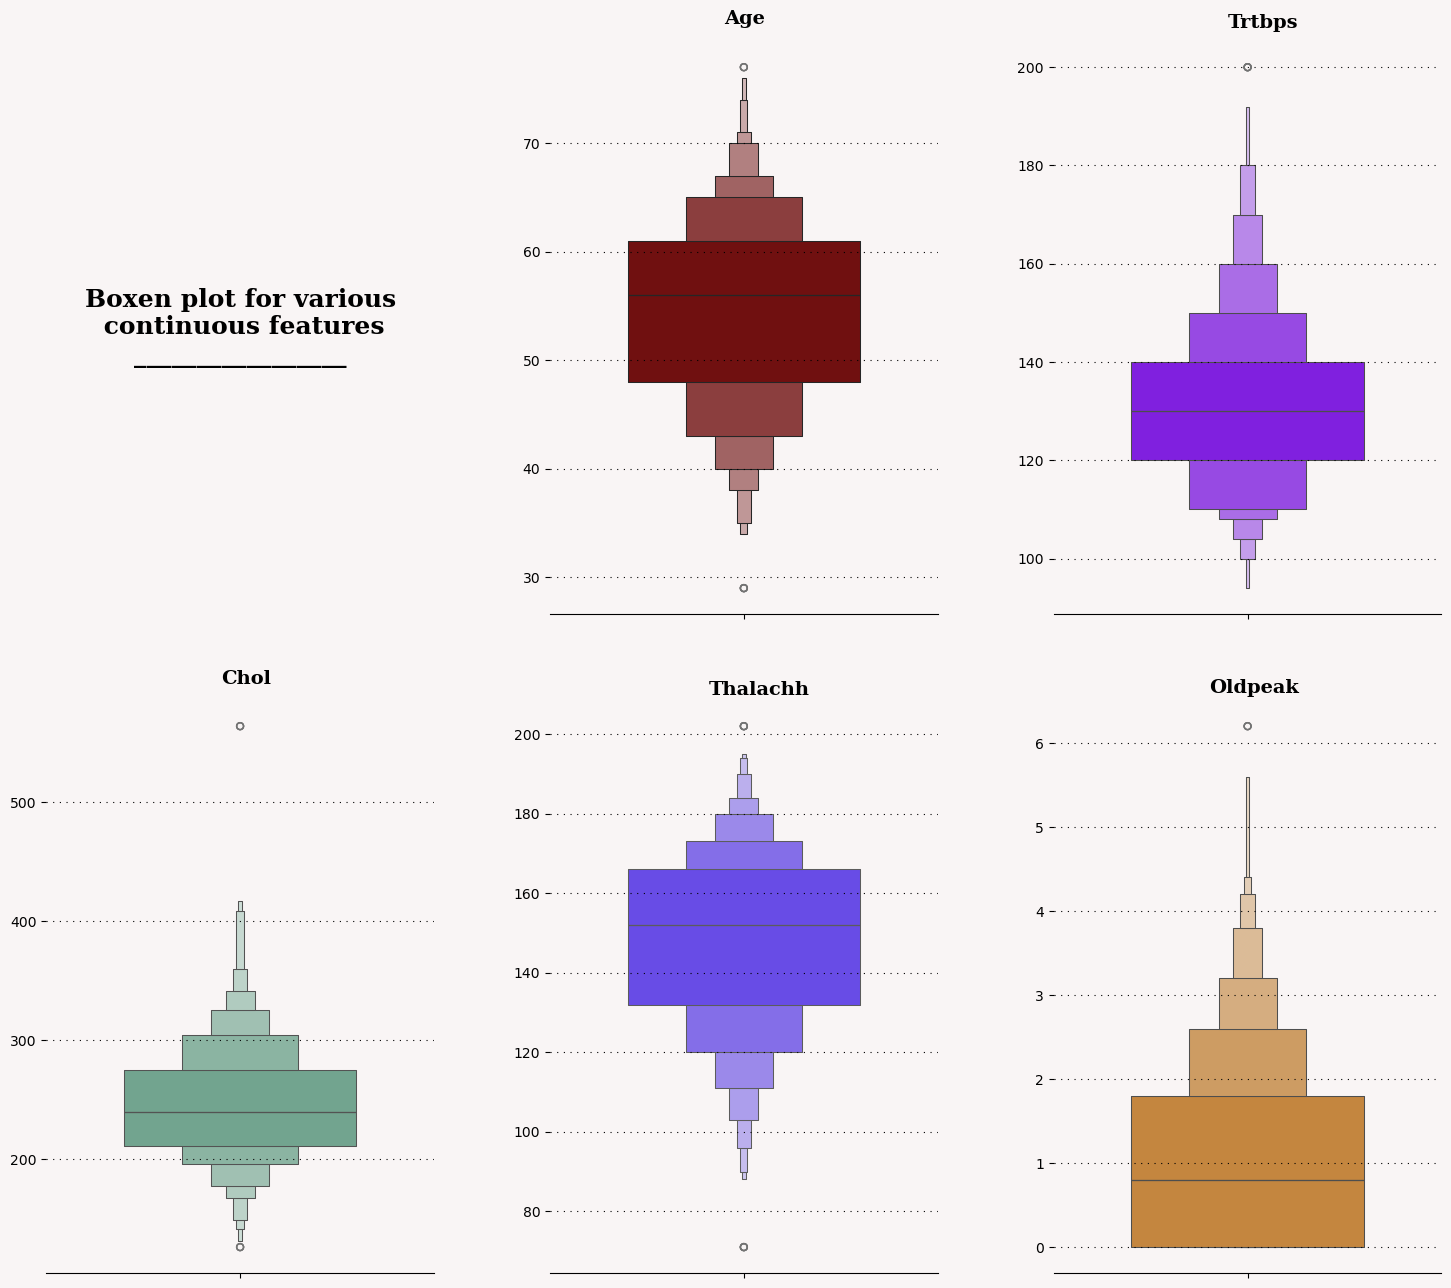

In [31]:
fig = plt.figure(figsize=(18,16))
gs = fig.add_gridspec(2,3)
gs.update(wspace=0.3, hspace=0.15)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[0,2])
ax3 = fig.add_subplot(gs[1,0])
ax4 = fig.add_subplot(gs[1,1])
ax5 = fig.add_subplot(gs[1,2])

background_color = "#f9f5f5"
color_palette = ["#800000","#8000ff","#6aac90","#5833ff","#da8829"]
fig.patch.set_facecolor(background_color)
ax0.set_facecolor(background_color)
ax1.set_facecolor(background_color)
ax2.set_facecolor(background_color)
ax3.set_facecolor(background_color)
ax4.set_facecolor(background_color)
ax5.set_facecolor(background_color)

# Title of the plot
ax0.spines["bottom"].set_visible(False)
ax0.spines["left"].set_visible(False)
ax0.spines["top"].set_visible(False)
ax0.spines["right"].set_visible(False)
ax0.tick_params(left=False, bottom=False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.text(0.5,0.5,
         'Boxen plot for various\n continuous features\n_________________',
         horizontalalignment='center',
         verticalalignment='center',
         fontsize=18, fontweight='bold',
         fontfamily='serif',
         color="#000000")

# Age
ax1.text(-0.05, 81, 'Age', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax1,y=heart_dataset['age'],palette=["#800000"],width=0.6)
ax1.set_xlabel("")
ax1.set_ylabel("")

# Trtbps
ax2.text(-0.05, 208, 'Trtbps', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax2.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax2,y=heart_dataset['trestbps'],palette=["#8000ff"],width=0.6)
ax2.set_xlabel("")
ax2.set_ylabel("")

# Chol
ax3.text(-0.05, 600, 'Chol', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax3.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax3,y=heart_dataset['chol'],palette=["#6aac90"],width=0.6)
ax3.set_xlabel("")
ax3.set_ylabel("")

# Thalachh
ax4.text(-0.09, 210, 'Thalachh', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax4.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax4,y=heart_dataset['thalach'],palette=["#5833ff"],width=0.6)
ax4.set_xlabel("")
ax4.set_ylabel("")

# Oldpeak
ax5.text(-0.1, 6.6, 'Oldpeak', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax5.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax5,y=heart_dataset['oldpeak'],palette=["#da8829"],width=0.6)
ax5.set_xlabel("")
ax5.set_ylabel("")

# Hide unnecessary spines
for s in ["top","right","left"]:
    ax1.spines[s].set_visible(False)
    ax2.spines[s].set_visible(False)
    ax3.spines[s].set_visible(False)
    ax4.spines[s].set_visible(False)
    ax5.spines[s].set_visible(False)

plt.show()


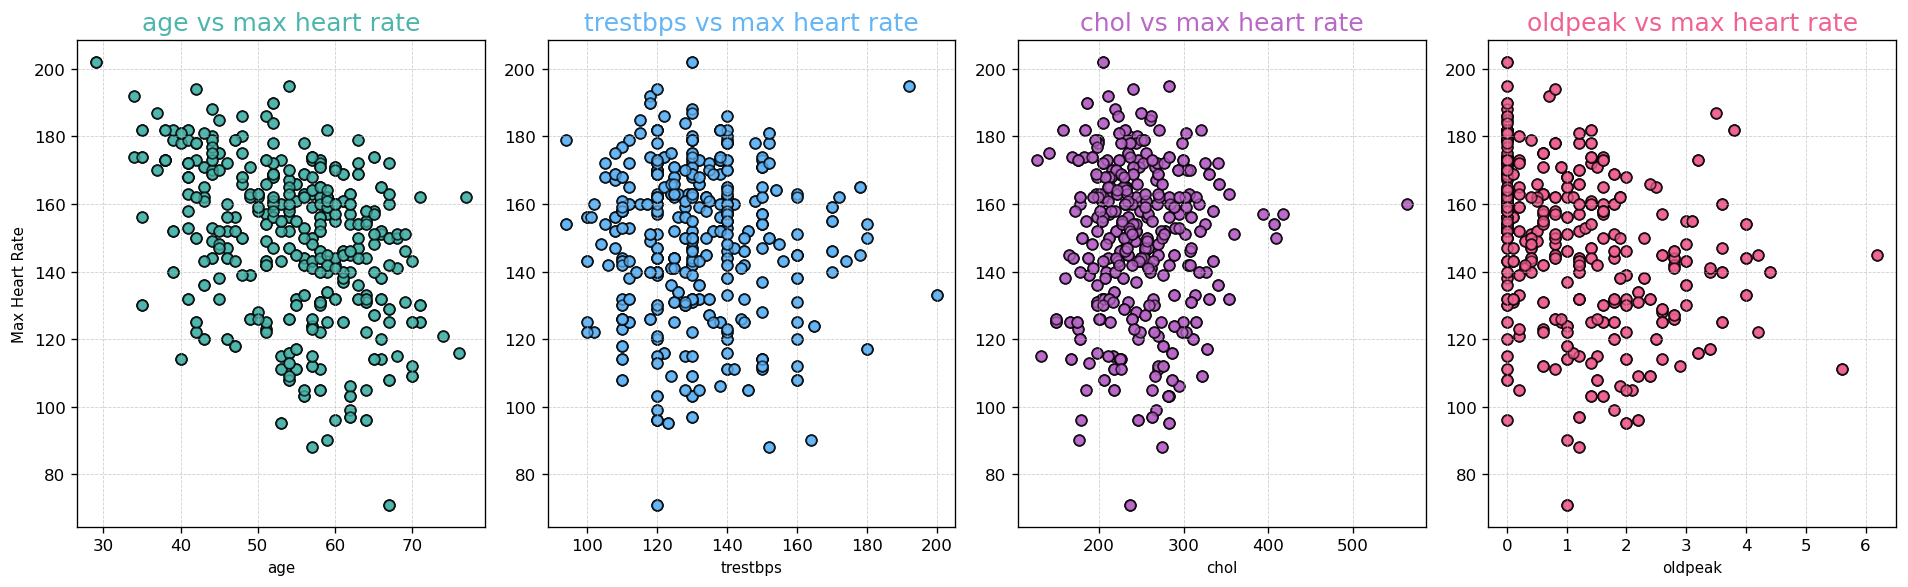

In [32]:
col_continuous = ['age', 'trestbps', 'chol', 'oldpeak', 'thalach']
col_categorical = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

# Subset datasets again if needed
df_continuous = heart_dataset[col_continuous].copy()
df_categorical = heart_dataset[col_categorical].copy()

colors = ['#4db6ac', '#64b5f6', '#ba68c8', '#f06292', '#ffd54f']

# Columns to plot (excluding 'thalach')
cols = col_continuous[:-1]  # Make sure 'thalach' is the last in col_continous

fig, axes = plt.subplots(ncols=len(cols), figsize=(16, 5), dpi=120)

for i, col in enumerate(cols):
    ax = axes[i]
    ax.scatter(df_continuous[col], df_continuous['thalach'],color=colors[i % len(colors)], alpha=0.7, edgecolors='k', s=40)
    ax.set_title(f"{col} vs max heart rate", fontsize=15, color=colors[i % len(colors)])
    ax.set_xlabel(col, fontsize=9)
    if i == 0:
        ax.set_ylabel('Max Heart Rate', fontsize=9)
    ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.6)

plt.tight_layout()
plt.show()
